<a href="https://colab.research.google.com/github/Farhan5559/PRODIGY_DS_1/blob/main/PRODIGY_DS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Download and Load Dataset**

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the actual dataset
df = pd.read_csv('bank-full.csv', sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Step 2: Preprocessing & Encoding**

In [ ]:
# Step 3: Checking null values
print(df.isnull().sum())

# Step 4: Encode categorical variables using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


**Step 3: Train/Test Split**

In [ ]:
# Step 5: Split the data into X and y
X = df.drop('y', axis=1)     # Features
y = df['y']                  # Target (0 = no, 1 = yes)

# Step 6: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Step 4: Train Decision Tree Classifier**

In [ ]:
# Step 7: Train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = clf.predict(X_test)


**Step 5: Evaluate the Model**

Accuracy: 0.8740462235983634

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



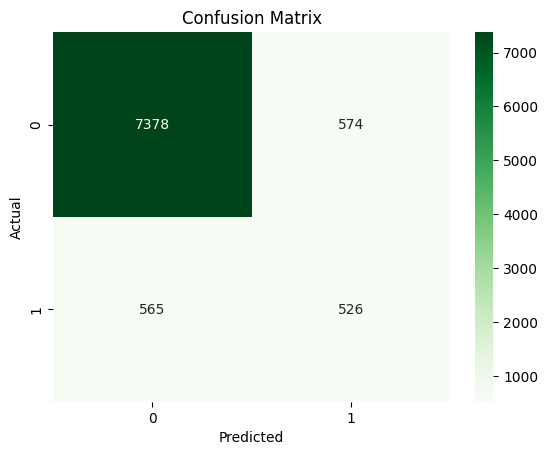

In [ ]:
# Step 9: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()